# Roving Balls

*An appropriately named dyamic dataset generator.*

This is a demo of the roving balls generator which will produce two gaussian clusters of datapoints that rotate around a common centre.

## Why?

After half of a period, the cluster centers will have exactly switched locations. This makes classification very difficult in batch mode, but online algorithms should have decision boundaries that rotate along with the balls.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython import display
import time

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,9,)

In [3]:
def rotation_matrix(theta):
    return np.array([[ np.cos(theta), np.sin(theta)], 
                     [-np.sin(theta), np.cos(theta)]])

In [4]:
def generate_balls(steps=1000, period=1000, radius=5, var1=1, var2=1, center=(0,0)):
    i = -1
    
    def cond(i):
        if not steps:
            # Go forever
            return True
        else:
            return i < steps
    
    # initialize the cluster centers (one on either side of the global center)
    locs = np.array([center, center]).copy()
    locs[0,0] += radius
    locs[1,0] -= radius
    
    scales = [var1, var2]
    dtheta = 2*np.pi/period
    rot = rotation_matrix(dtheta)
    
    while cond(i):
        i += 1
        locs = locs@rot  # rotate cluster centers by dtheta
        lab = np.random.choice([0,1])  # choose a ball to draw from
        x = np.random.normal(loc=locs[lab], scale=scales[lab])
        yield np.hstack([x,lab])
        

We can visualize what's happening with a little animation:

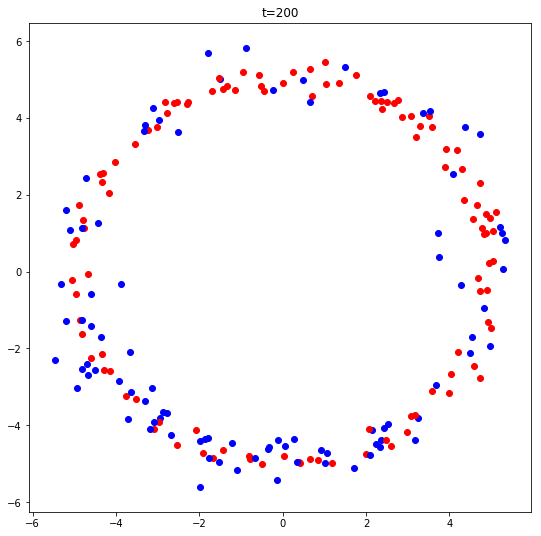

In [5]:
for t, x in enumerate(generate_balls(200, 150, var1=0.2, var2=0.5)):
    plt.scatter(*x[:2], color=['r','b'][int(x[-1])])
    plt.title(f't={t}')
    display.clear_output(wait=True)
    display.display(plt.gcf())

display.clear_output()

It's also easy to generate a dataframe of the balls for batch testing:

In [7]:
df = pd.DataFrame(generate_balls(10000, 15000), columns=['x1','x2','y'])
df.index.name = 't'

In [8]:
df.head()

,x1,x2,y
t,,,
0,-5.216724,0.095883,1.0
1,7.080995,-1.433280,0.0
2,-5.610039,-1.599302,1.0
3,3.908165,-0.265288,0.0
4,-5.015445,-0.296603,1.0


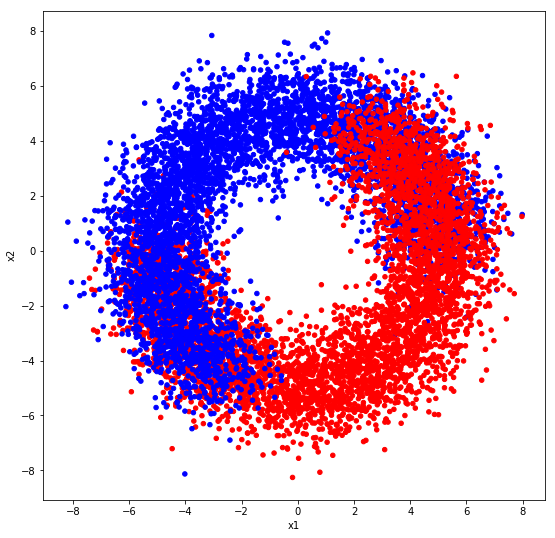

In [9]:
df.plot.scatter('x1', 'x2', color=df['y'].apply(lambda x: 'r' if x else 'b'));